# Lets Find The Best Region For a New Well

# Intro:
In this project we are going to be utilizing various ML techniques to help find the best location for a new well. 


I will:
Collect the oil well parameters in the selected region: oil quality and volume of reserves;
Build a model for predicting the volume of reserves in the new wells;
Pick the oil wells with the highest estimated values;
Pick the region with the highest total profit for the selected oil wells.
Build a model that will help to pick the region with the highest profit margin. 
Analyze potential profit and risks using the Bootstrapping technique.

# Part 1: Download and prepare the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

Imported the need modules for the project.

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df0['id'].value_counts()[df0['id'].value_counts() > 1]

HZww2    2
bxg6G    2
fiKDv    2
74z30    2
QcMuo    2
AGS9W    2
A5aEY    2
TtcGQ    2
Tdehs    2
bsk9y    2
Name: id, dtype: int64

In [7]:
df1['id'].value_counts()[df1['id'].value_counts() > 1]

wt4Uk    2
5ltQ6    2
LHZR0    2
bfPNe    2
Name: id, dtype: int64

In [8]:
df2['id'].value_counts()[df2['id'].value_counts() > 1]

KUPhW    2
Vcm5J    2
VF7Jo    2
xCHr8    2
Name: id, dtype: int64

In [9]:
df0= df0.drop_duplicates(subset='id', keep=False)


In [10]:
df0['id'].value_counts()[df0['id'].value_counts() > 1]

Series([], Name: id, dtype: int64)

In [11]:
df1= df1.drop_duplicates(subset='id', keep=False)

In [12]:
df1['id'].value_counts()[df1['id'].value_counts() > 1]

Series([], Name: id, dtype: int64)

In [13]:
df2= df2.drop_duplicates(subset='id', keep=False)

In [14]:
df2['id'].value_counts()[df2['id'].value_counts() > 1]

Series([], Name: id, dtype: int64)

In [15]:
# Reviewer's code 2

df2['id'].duplicated().sum()

0

In [16]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [17]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [18]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


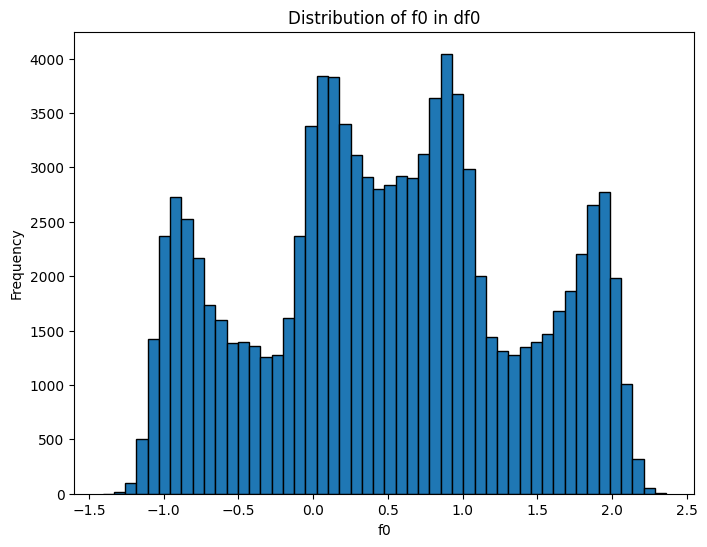

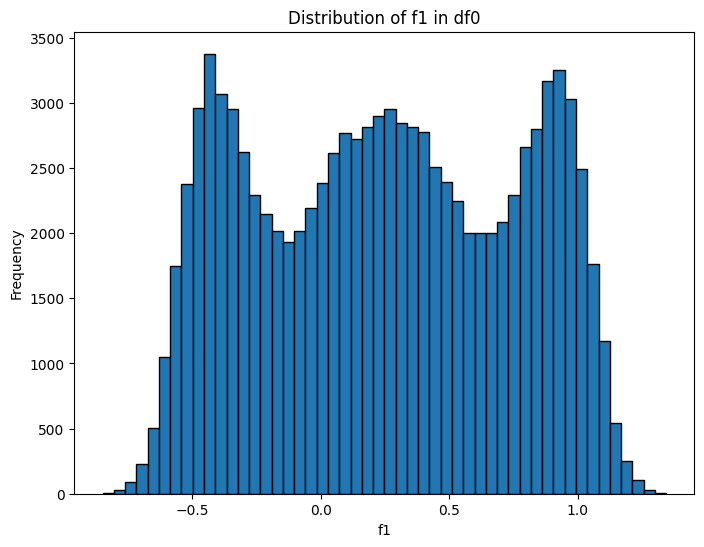

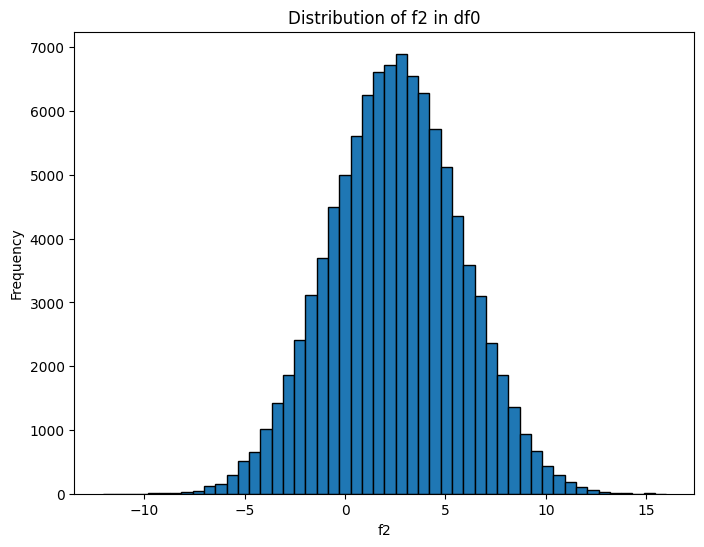

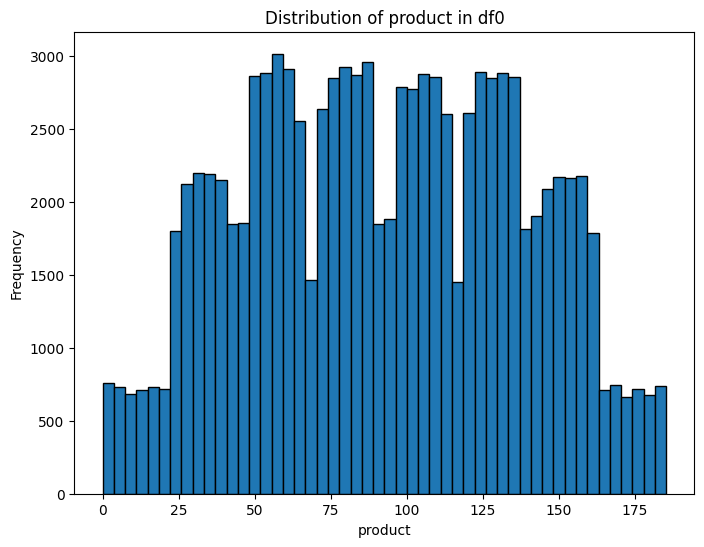

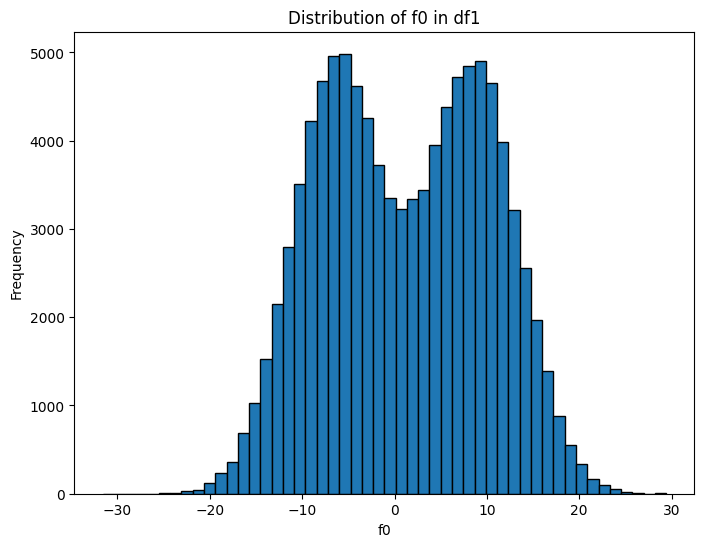

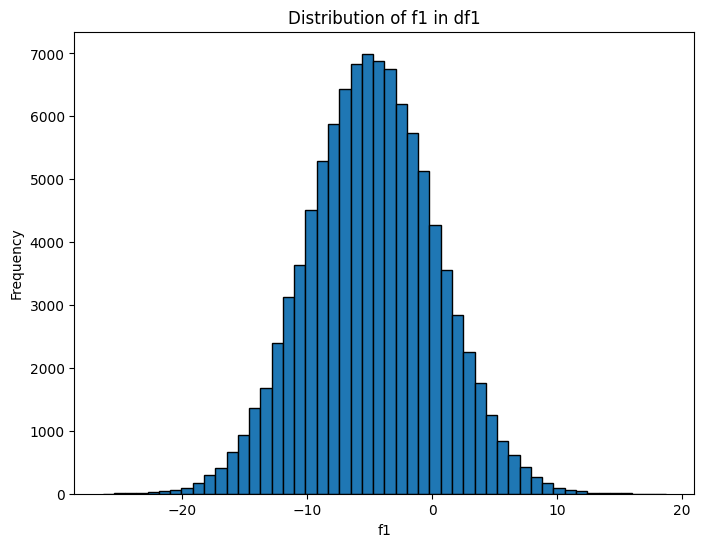

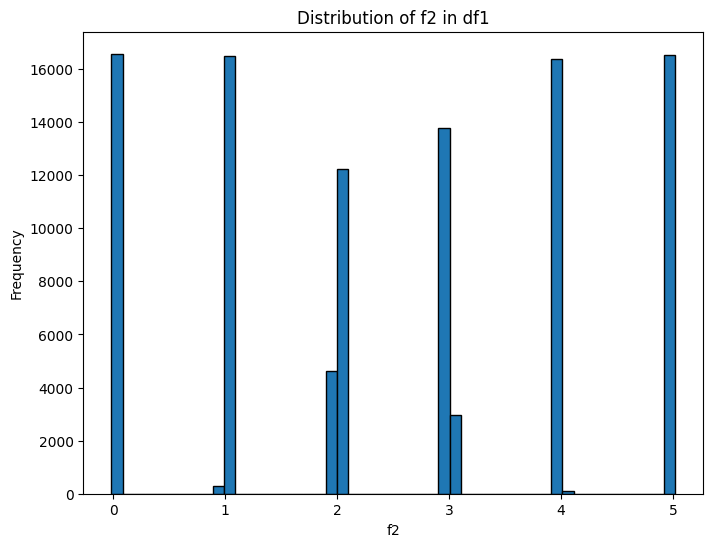

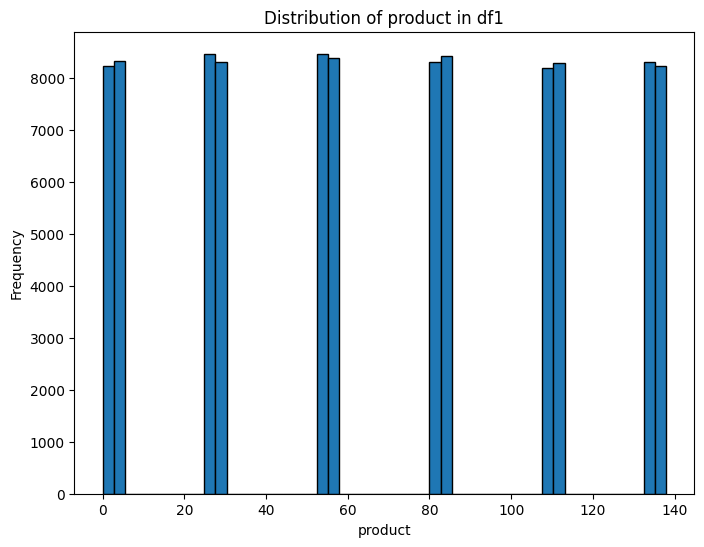

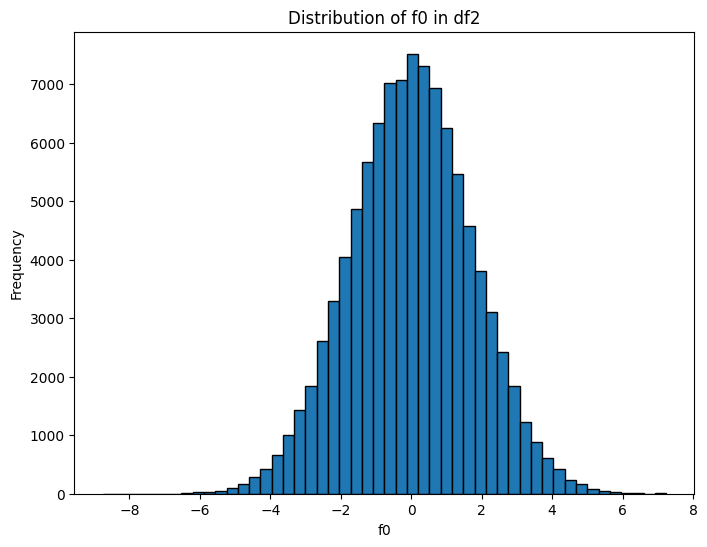

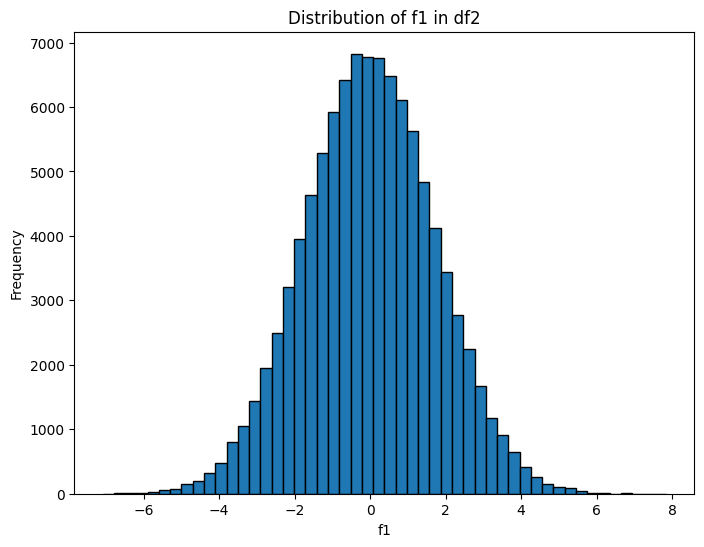

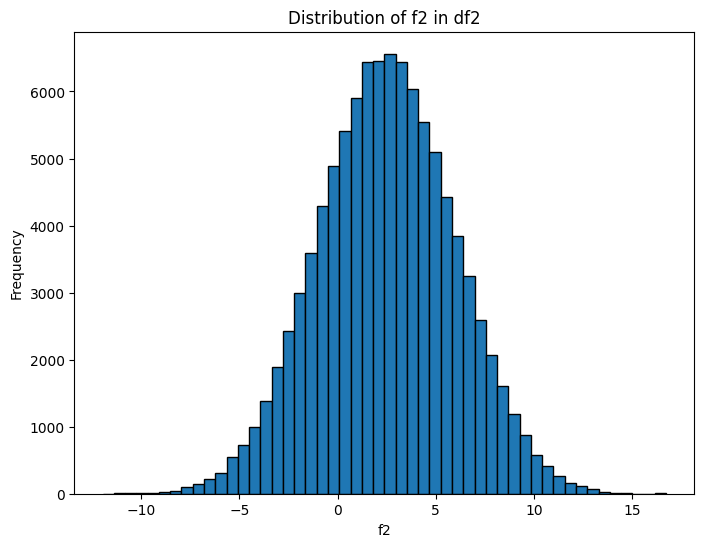

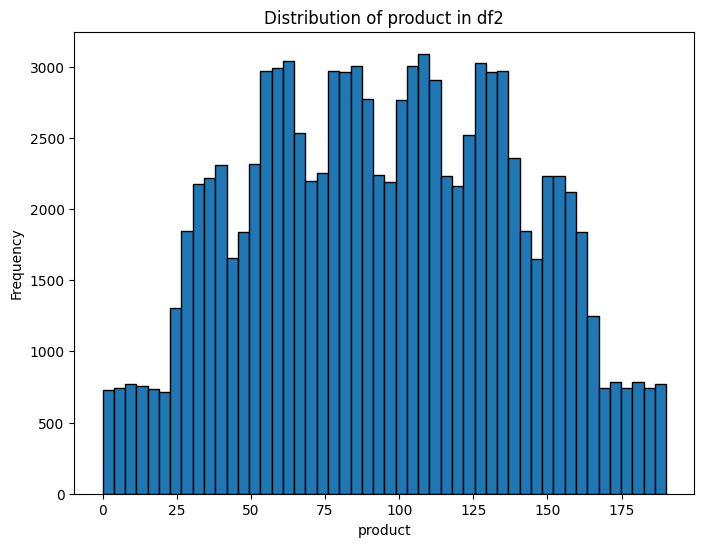

In [19]:
def plot_numerical_histograms(df, numerical_cols, df_name):
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=50, edgecolor='black')
        plt.title(f"Distribution of {col} in {df_name}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

numerical_cols0 = df0[['f0', 'f1', 'f2', 'product']]
plot_numerical_histograms(df0, numerical_cols0, "df0")

        
numerical_cols1 = df1[['f0', 'f1', 'f2', 'product']]
plot_numerical_histograms(df1, numerical_cols1, "df1")

numerical_cols2 = df2[['f0', 'f1', 'f2', 'product']]
plot_numerical_histograms(df2, numerical_cols2, "df2")

In the above cells I have first imported the data that we are working with. After that I did a quick info check to look at DTypes and see if I had any missing data that needed to be filled in. I found that we had no missing entries and the correct Dtypes for each dataset. I also checked for duplicates in the id field because there should only be 1 of each due to them being unique identifiers for the oil wells. The last thing I did was pull the first 5 rows of each dataset to see what we were working with. Looking at the charts we can see we have some outliers so after we split the data we will scale it.

# Part 2: Train and test the model for each region

In [20]:
# Split the datasets into training and validation sets
X0_train, X0_valid, y0_train, y0_valid = train_test_split(df0.drop(['id','product'], axis=1), df0['product'], test_size=0.25, random_state=123)

X1_train, X1_valid, y1_train, y1_valid = train_test_split(df1.drop(['id','product'], axis=1), df1['product'], test_size=0.25, random_state=123)

X2_train, X2_valid, y2_train, y2_valid = train_test_split(df2.drop(['id','product'], axis=1), df2['product'], test_size=0.25, random_state=123)

In [21]:
scaler = StandardScaler()

df0[['f0', 'f1', 'f2']]= scaler.fit_transform(df0[['f0', 'f1', 'f2']])


df0[['f0', 'f1', 'f2']].head()


,f0,f1,f2
0,0.235468,-1.482807,-0.394536
1,0.956863,-1.170259,0.573405
2,0.599038,-0.194590,-0.333343
3,-0.610889,-0.220278,0.146528
4,1.706650,-0.187806,0.692458


In [22]:

df1[['f0', 'f1', 'f2']]= scaler.fit_transform(df1[['f0', 'f1', 'f2']])


df1[['f0', 'f1', 'f2']].head()


,f0,f1,f2
0,-1.800484,-0.679598,-1.467726
1,1.464541,0.258098,-0.877757
2,0.571265,-0.224977,1.471402
3,-1.586319,-1.310480,1.470378
4,1.289443,-0.654487,1.473282


In [23]:


df2[['f0', 'f1', 'f2']]= scaler.fit_transform(df2[['f0', 'f1', 'f2']])


df2[['f0', 'f1', 'f2']].head()


,f0,f1,f2
0,-0.663353,0.557931,-0.956982
1,0.150575,0.157162,-1.446758
2,0.111205,0.168255,-2.326639
3,1.289848,-0.318798,-0.450572
4,-0.299048,0.993055,0.979977


Above I have seperated the datasets into training and validation sets for the features (X) and the Target (y). 

In [24]:
model_0 = LinearRegression()# initialize model constructor
model_0.fit(X0_train, y0_train) # train model on training set
y0_pred = model_0.predict(X0_valid) # get model predictions on validation set

In [25]:
y0_val_pred = pd.DataFrame({'prediction': y0_pred, 'actual': y0_valid})


In [26]:
mse_0 = mean_squared_error(y0_valid, y0_pred)
rmse_0 = mse_0 ** 0.5

In [27]:
model_1 = LinearRegression()# initialize model constructor
model_1.fit(X1_train, y1_train) # train model on training set
y1_pred = model_1.predict(X1_valid) # get model predictions on validation set

In [28]:
y1_val_pred = pd.DataFrame({'prediction': y1_pred, 'actual': y1_valid})

In [29]:
mse_1 = mean_squared_error(y1_valid, y1_pred)
rmse_1 = mse_1 ** 0.5

In [30]:
model_2 = LinearRegression()# initialize model constructor
model_2.fit(X2_train, y2_train) # train model on training set
y2_pred = model_2.predict(X2_valid) # get model predictions on validation set

In [31]:
y2_val_pred = pd.DataFrame({'prediction': y2_pred, 'actual': y2_valid})

In [32]:
mse_2 = mean_squared_error(y2_valid, y2_pred)
rmse_2 = mse_2 ** 0.5

In [33]:
print('Region 0:')
print('Average predicted reserves:', y0_pred.mean())
print('Model RMSE:', rmse_0)
print()
print()
print('Region 1:')
print('Average predicted reserves:', y1_pred.mean())
print('Model RMSE:', rmse_1)
print()
print()
print('Region 2:')
print('Average predicted reserves:', y2_pred.mean())
print('Model RMSE:', rmse_2)


Region 0:
Average predicted reserves: 92.73402371136319
Model RMSE: 37.55599440454597


Region 1:
Average predicted reserves: 68.61009077717529
Model RMSE: 0.8942818776703


Region 2:
Average predicted reserves: 95.0022143086602
Model RMSE: 39.941244738090504


As we can see above our predicted average reserves for the 3 regions are pretty close with region 0 and 2 but region 1 is quite lower. That being said region 1 has the lowest rmse which tells me that it has the lowest margin of error and will probably be the safest bet. We will find this out a little later after we train and run our model! 

# Part 3: Prepare for profit calculation

In [34]:
revenue_per_unit = 4500

In [35]:
budget = 100000000

In [36]:
num_wells_to_select = 200

In [37]:
volume_sufficient_for_profit = budget / (num_wells_to_select * revenue_per_unit)

print("Volume sufficient for profit:", volume_sufficient_for_profit)

Volume sufficient for profit: 111.11111111111111


In [38]:
avg_volume_region_0 = y0_valid.mean()
avg_volume_region_1 = y1_valid.mean()
avg_volume_region_2 = y2_valid.mean()

print("Average volume in Region 0:", avg_volume_region_0)
print("Average volume in Region 1:", avg_volume_region_1)
print("Average volume in Region 2:", avg_volume_region_2)

Average volume in Region 0: 92.6776620458054
Average volume in Region 1: 68.6016203880104
Average volume in Region 2: 94.80697574578565


We can see above that none of our regions have an average volume that is sufficient to make a profit. Again like our prediction above it looks like Region 2 would have the least profit loss out of the three regions.



# Part 4: Write a function to calculate profit from a set of selected oil wells and model predictions

In [39]:
def calculate_profit(predictions, target_values):
    top_points = np.argsort(predictions)[-200:]  # Select top 200 predictions
    total_volume = np.take(target_values, top_points, axis=0).sum()
    profit = total_volume * revenue_per_unit - budget
    return profit

In [40]:
calculate_profit(y0_pred,y0_valid)

32450668.08563529

In [41]:
calculate_profit(y1_pred,y1_valid)

24150866.966815114

In [42]:
calculate_profit(y2_pred,y2_valid)

22277604.625215545

# Part 5: Calculate risks and profit for each region:

In [43]:

def bootstrap_profit(region):
    # Get the predicted and actual volumes for the region
    if region == 0:
        predicted_volumes = y0_pred
        actual_volumes = y0_valid
    elif region == 1:
        predicted_volumes = y1_pred
        actual_volumes = y1_valid
    elif region == 2:
        predicted_volumes = y2_pred
        actual_volumes = y2_valid
    
    # Ensure actual_volumes is a NumPy array
    actual_volumes = np.array(actual_volumes)
    
    # Initialize an array to store the bootstrapped profits
    bootstrapped_profits = np.zeros(1000)
    
    # Perform bootstrapping
    for i in range(1000):
        # Sample 500 indices with replacement from the predicted volumes index
        sample_indices = np.random.choice(len(predicted_volumes), size=500, replace=True)
        
        # Select the corresponding predictions using NumPy indexing
        resampled_predicted_volumes = predicted_volumes[sample_indices]
        resampled_actual_volumes = actual_volumes[sample_indices]
        
        # Select the top 200 predictions within the resampled set
        top_indices = resampled_predicted_volumes.argsort()[-200:]
        top_resampled_predicted_volumes = resampled_predicted_volumes[top_indices]
        top_resampled_actual_volumes = resampled_actual_volumes[top_indices]
        
        # Calculate the profit for the resampled volumes
        profit = calculate_profit(top_resampled_predicted_volumes, top_resampled_actual_volumes)
        
        # Store the profit in the array
        bootstrapped_profits[i] = profit
    
    # Calculate the average profit and 95% confidence interval
    avg_profit = np.mean(bootstrapped_profits)
    ci_lower = np.percentile(bootstrapped_profits, 2.5)
    ci_upper = np.percentile(bootstrapped_profits, 97.5)
    
    # Calculate the risk of losses (negative profit)
    risk_of_losses = np.mean(bootstrapped_profits < 0)
    
    return avg_profit, ci_lower, ci_upper, risk_of_losses

region_0_avg_profit, region_0_ci_lower, region_0_ci_upper, region_0_risk_of_losses = bootstrap_profit(0)
region_1_avg_profit, region_1_ci_lower, region_1_ci_upper, region_1_risk_of_losses = bootstrap_profit(1)
region_2_avg_profit, region_2_ci_lower, region_2_ci_upper, region_2_risk_of_losses = bootstrap_profit(2)

print("Region 0:")
print("Average profit:", region_0_avg_profit)
print("95% CI:", (region_0_ci_lower, region_0_ci_upper))
print("Risk of losses:", region_0_risk_of_losses)

print("Region 1:")
print("Average profit:", region_1_avg_profit)
print("95% CI:", (region_1_ci_lower, region_1_ci_upper))
print("Risk of losses:", region_1_risk_of_losses)

print("Region 2:")
print("Average profit:", region_2_avg_profit)
print("95% CI:", (region_2_ci_lower, region_2_ci_upper))
print("Risk of losses:", region_2_risk_of_losses)

Region 0:
Average profit: 4414696.178477012
95% CI: (-597805.5103052872, 9174810.698396247)
Risk of losses: 0.037
Region 1:
Average profit: 4310381.604674861
95% CI: (503003.55192001094, 8496599.559196286)
Risk of losses: 0.013
Region 2:
Average profit: 3588274.2464066143
95% CI: (-1401801.7034898158, 8461181.797163505)
Risk of losses: 0.085


# Conclusion
After cleaning up our data, then training some linear regression models and doing some calculations for profit we have found out which region we should be looking to put that new well! We only have one region that meets our criteria of having a calculated risk of 2.5% or less and that turns out to be Region 1. Even tho it had the lowest average reserves it also had the least amount of room for error overall. After doing the bootstrap process and calculating CI we see that region 1 doesnt have the highest average profit out of the 3 but its not the lowest either. It has a risk of loss of only 1.3% which is significantly better then the other two regions.